In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pd.set_option("display.max_columns",None)

In [5]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.4 MB/s eta 0:00:00


In [6]:
import category_encoders as ce

In [7]:
dataset = pd.read_csv("/content/car_evaluation.csv")

In [8]:
dataset.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


# data preprocessing

In [10]:
df = dataset.copy()

In [12]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [13]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [14]:
df["class"].value_counts()

,count
class,
unacc,1209
acc,384
good,69
vgood,65


In [15]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


# independent and dependent feature

In [17]:
x = df.drop("class",axis=1)
y = df["class"]

# train test split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# encoading

In [22]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

In [23]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
900,2,2,2,2,1,2
1708,3,3,3,1,2,3
705,4,4,4,1,3,2
678,4,4,2,1,3,2


In [24]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,4,1,4,1,2,1
932,2,2,4,2,2,1
628,4,1,3,1,2,3
1497,3,1,3,2,3,2
1262,2,3,4,3,3,1


# Decision tree

## post pruning

In [37]:
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

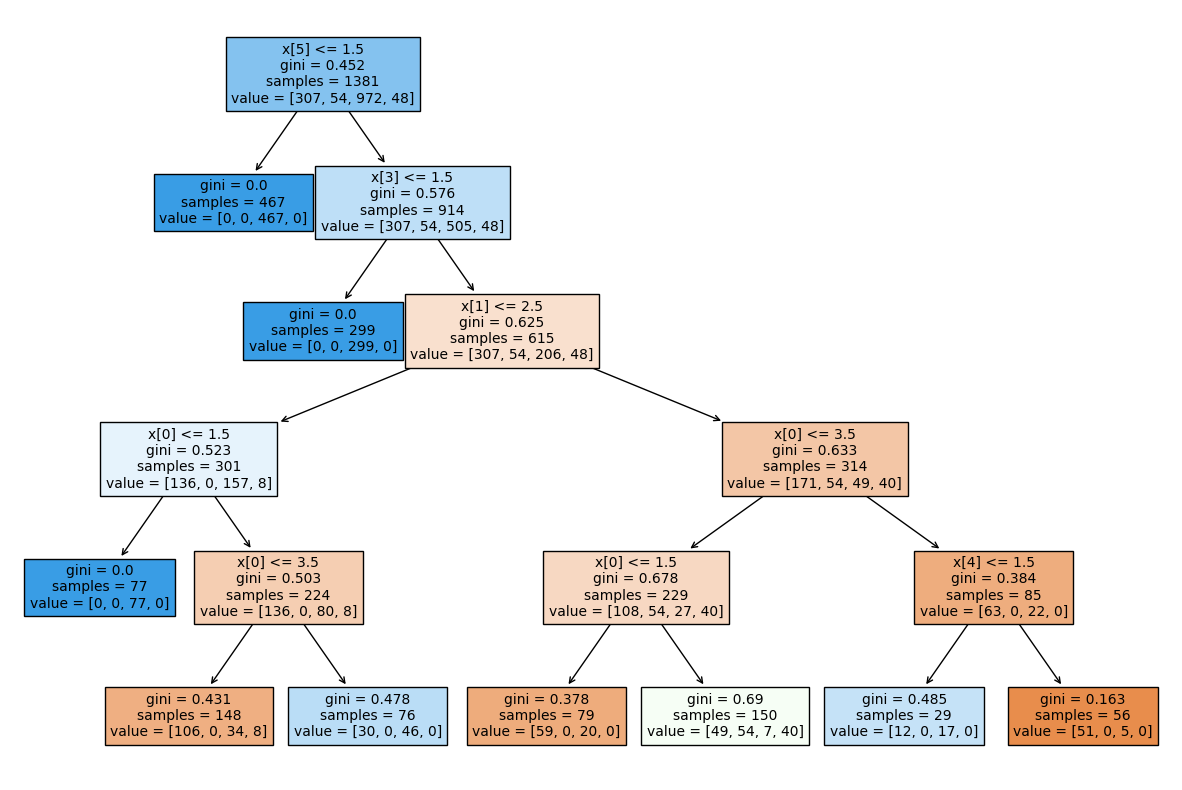

In [40]:
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree,filled=True,fontsize=10)
plt.show()

In [41]:
pred = decision_tree.predict(x_test)

In [42]:
accuracy = accuracy_score(y_test,pred)
accuracy

0.8583815028901735